<a href="https://colab.research.google.com/github/Ro-Vad1m/My-works/blob/main/AB_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [22]:
from google.colab import files
uploaded = files.upload()

Saving _ab_test_data.csv to _ab_test_data (1).csv


In [23]:
df = pd.read_csv('_ab_test_data.csv')

In [24]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [25]:
df.isnull().sum()

,0
user_id,0
timestamp,0
test_group,0
conversion,0


In [26]:
df.groupby('test_group').describe()

timestamp                                 \
               count                           mean   
test_group                                            
a              10013  2023-07-14 02:34:29.519821312   
b               9985  2023-07-13 21:37:07.888925952   

                                                                       \
                                   min                            25%   
test_group                                                              
a           2023-07-03 01:46:14.688840  2023-07-08 13:48:52.874817024   
b           2023-07-03 01:42:34.033708  2023-07-08 08:08:48.495631104   

                                                                          \
                                      50%                            75%   
test_group                                                                 
a           2023-07-14 03:49:36.002731008  2023-07-19 14:06:28.688054016   
b           2023-07-13 19:14:14.073116928  2023-07-19 09:59:58.771382016   

                                            conversion                      \
                                   max  std      count      mean  min  25%   
test_group                                                                   
a           2023-07-25 01:41:19.152664  NaN    10013.0  0.061021  0.0  0.0   
b           2023-07-25 01:35:59.130658  NaN     9985.0  0.089034  0.0  0.0   

                                     
            50%  75%  max       std  
test_group                           
a           0.0  0.0  1.0  0.239380  
b           0.0  0.0  1.0  0.284806

In [45]:
# 1
users_a = len(df[df['test_group'] == 'a'])
users_b = len(df[df['test_group'] == 'b'])
conv_a = df[df['test_group'] == 'a']['conversion'].sum()
conv_b = df[df['test_group'] == 'b']['conversion'].sum()
rate_a = conv_a / users_a * 100
rate_b = conv_b / users_b * 100

start_date = df['timestamp'].min().date()
end_date = df['timestamp'].max().date()
days = (end_date - start_date).days + 1

print(f"Група A: {users_a}   Конверсій: {conv_a}  {rate_a:.2f}%")
print(f"Група B: {users_b}   Конверсій: {conv_b}  {rate_b:.2f}%")
print(f"Тест тривав з {start_date} по {end_date}")
print(f"Тривалість: {days} днів")

Група A: 10013   Конверсій: 611  6.10%
Група B: 9985   Конверсій: 889  8.90%
Тест тривав з 2023-07-03 по 2023-07-25
Тривалість: 23 днів


In [42]:
from scipy.stats import chi2_contingency

In [46]:
# 2. Х²-тест
table = [[conv_a, users_a - conv_a],
         [conv_b, users_b - conv_b]]

chi2, p, dof, expected = chi2_contingency(table)
print(f"Х² = {chi2:.3f}, p-value = {p:.6f}")
print("Різниця статистично значуща (p < 0.05)" if p < 0.05 else "Різниця не значуща")


Х² = 56.142, p-value = 0.000000
Різниця статистично значуща (p < 0.05)


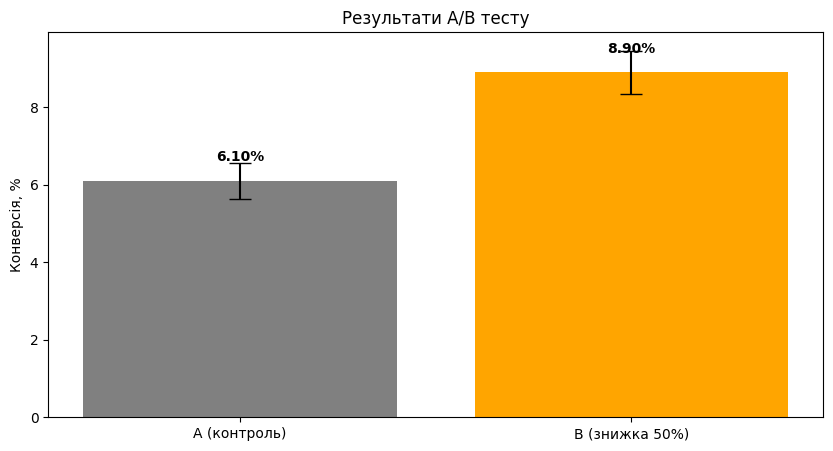

In [60]:
# 3. Графік з 95% довірчими інтервалами
plt.figure(figsize=(10,5))
plt.bar(['A (контроль)', 'B (знижка 50%)'], [rate_a, rate_b],
        yerr=[err_a, err_b], capsize=8, color=['gray', 'orange'])
plt.ylabel('Конверсія, %')
plt.title('Результати A/B тесту')
for i, v in enumerate([rate_a, rate_b]):
    plt.text(i, v+0.5, f'{v:.2f}%', ha='center', fontweight='bold')
plt.show()